# Preprocess

## Libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.visualization import mpsettings
from src.feng.time_relations import get_longevity

## Varriables

In [4]:
filepath =  "2004/dt_global_twosat_phy_l4_20040106_vDT2018"
ds = xr.open_dataset(f'../data/{filepath}.nc')
df = ds.to_dataframe()

In [5]:
df.sample(5)

crs  lat_bnds  lon_bnds     err  \
time       latitude nv longitude                                           
2004-01-06 -32.125  0  267.375   -2147483647    -32.25    267.25  0.0116   
           -28.125  1  98.875    -2147483647    -28.00     99.00  0.0199   
            53.625  1  350.125   -2147483647     53.75    350.25  0.0238   
            8.875   1  152.625   -2147483647      9.00    152.75  0.0140   
           -16.875  0  316.375   -2147483647    -17.00    316.25     NaN   

                                     adt    ugos    vgos     sla   ugosa  \
time       latitude nv longitude                                           
2004-01-06 -32.125  0  267.375    0.7645 -0.0818  0.0594  0.0743 -0.1072   
           -28.125  1  98.875     0.7170 -0.2432 -0.1879  0.0816 -0.2745   
            53.625  1  350.125       NaN     NaN     NaN  0.0416  0.0000   
            8.875   1  152.625    0.9173 -0.0367  0.0283 -0.0617  0.0446   
           -16.875  0  316.375       NaN     NaN     NaN     NaN     NaN   

                                   vgosa  
time       latitude nv longitude          
2004-01-06 -32.125  0  267.375    0.0542  
           -28.125  1  98.875    -0.2054  
            53.625  1  350.125   -0.0124  
            8.875   1  152.625    0.0341  
           -16.875  0  316.375       NaN

In [11]:
df.adt.isna().sum()
len(df.adt)/df.adt.isna().sum()

2.3090799759470837

# EDA

## Data structure

In [5]:
df.sample(5)

,,,,lat_bnds,lon_bnds,time_bnds,sea_surface_height_above_sea_level,surface_geostrophic_northward_sea_water_velocity,surface_geostrophic_eastward_sea_water_velocity
latitude,longitude,time,bnds,,,,,,
44.875,231.875,1993-04-05 12:00:00,1,45.00,232.00,1993-04-06,-0.024684,0.080904,-0.005747
42.875,243.125,1993-07-03 12:00:00,0,42.75,243.00,1993-07-03,NaN,NaN,NaN
33.625,236.875,1993-11-24 12:00:00,0,33.50,236.75,1993-11-24,-0.070410,0.088038,-0.161677
40.625,230.875,1993-12-25 12:00:00,1,40.75,231.00,1993-12-26,0.103815,-0.021083,0.114251
42.125,244.125,1993-11-08 12:00:00,1,42.25,244.25,1993-11-09,NaN,NaN,NaN


## Parse into one point

In [6]:
# Create a function to get a specific position
samp1 = df.loc[(df.index.get_level_values('latitude') == 32.125) & (df.index.get_level_values('longitude') == 225.125)]

## Posmap

Text(0, 0.5, 'longitude')

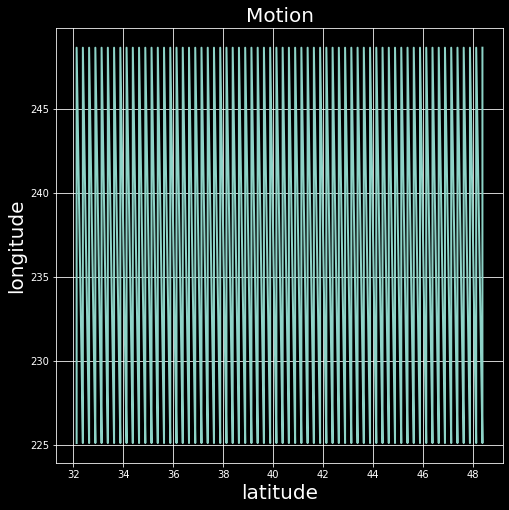

In [19]:
lng = "latitude"
lat = "longitude"

# Just a shortcut
giv = lambda s: df.index.get_level_values(s)

plt.plot(giv(lng),giv(lat))
plt.title("Motion")
plt.xlabel(lng)
plt.ylabel(lat)

## Time

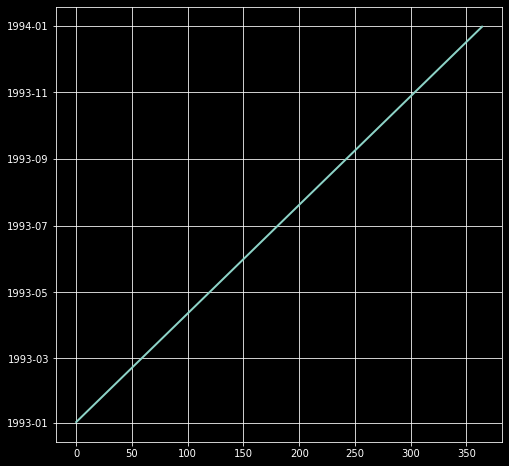

In [15]:
plt.plot(giv('time').unique())

Text(0, 0.5, 'Velocity eastward')

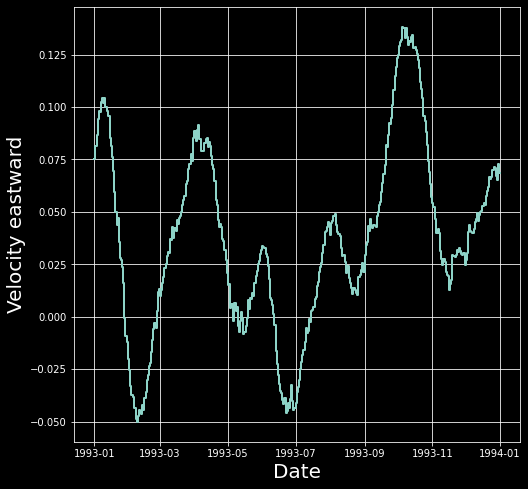

In [8]:
plt.plot(samp1.time_bnds,samp1.surface_geostrophic_eastward_sea_water_velocity)
plt.xlabel("Date")
plt.ylabel("Velocity eastward") #! Get the dimension for this

## Longevity

In [9]:
# This is how I calculeta longevity
get_longevity(df)

Timedelta('364 days 00:00:00')